Importing Libraries and Packages

In [ ]:
pip install statsmodels

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import sklearn

Connecting to Data

In [3]:
df = pd.read_csv(r"C:\Users\Soma Pavan Kumar\Downloads\Loan.csv")
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

EDA

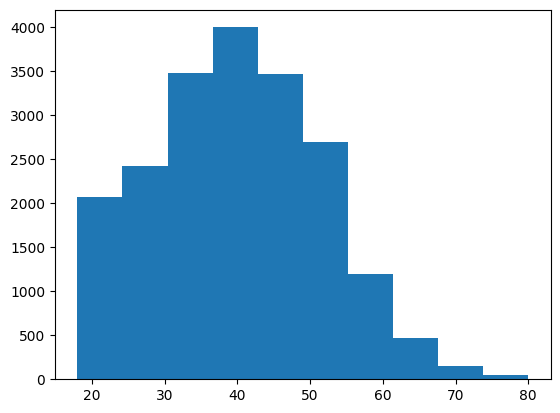

In [5]:
#inspecting the age column with Loan Approval column (target)

plt.hist(df['Age'])
plt.show()
#tail to the right and data is skewed to the left (toward 20-30)

In [6]:
df['Age'].describe()

count    20000.000000
mean        39.752600
std         11.622713
min         18.000000
25%         32.000000
50%         40.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

In [7]:
#printing skew and kurtosis
print("Skew : ", skew(df['Age']))
print("Kurtosis : ", kurtosis(df['Age']))

Skew :  0.18594998377643582
Kurtosis :  -0.31080685747070946


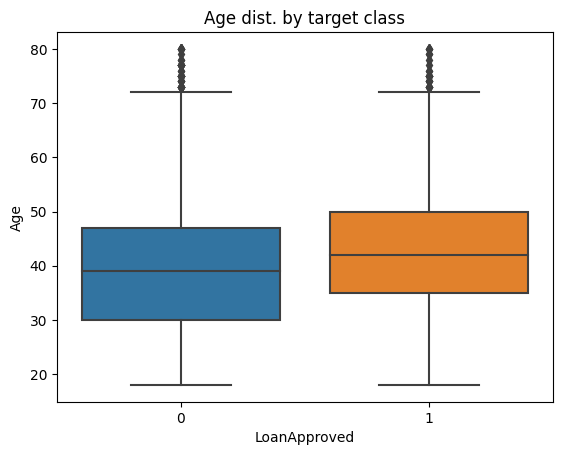

In [8]:
#plotting boxplot of age dist. by target (0/1)

sns.boxplot(x=df['LoanApproved'], y=df['Age'])
plt.title("Age dist. by target class")
plt.show()

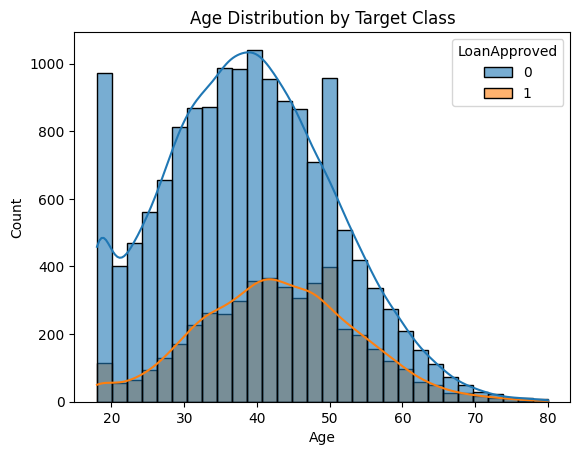

In [9]:
#histogram of age by target class

sns.histplot(df, x="Age", hue="LoanApproved", bins=30, kde=True, alpha=0.6)
plt.title("Age Distribution by Target Class")
plt.show()

In [10]:
from scipy.stats import ttest_ind

age_0 = df[df["LoanApproved"] == 0]["Age"]
age_1 = df[df["LoanApproved"] == 1]["Age"]

t_stat, p_value = ttest_ind(age_0, age_1, equal_var=False)
print("T-test p-value:", p_value)


T-test p-value: 3.572512215058957e-94


Age varies significantly between the target variable values

In [11]:
#correlation between target and age columns

df[["Age", "LoanApproved"]].corr()

,Age,LoanApproved
Age,1.000000,0.141029
LoanApproved,0.141029,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [13]:
#dropping risk score column 
df.drop(columns = ['RiskScore'], axis = 'columns', inplace = True)

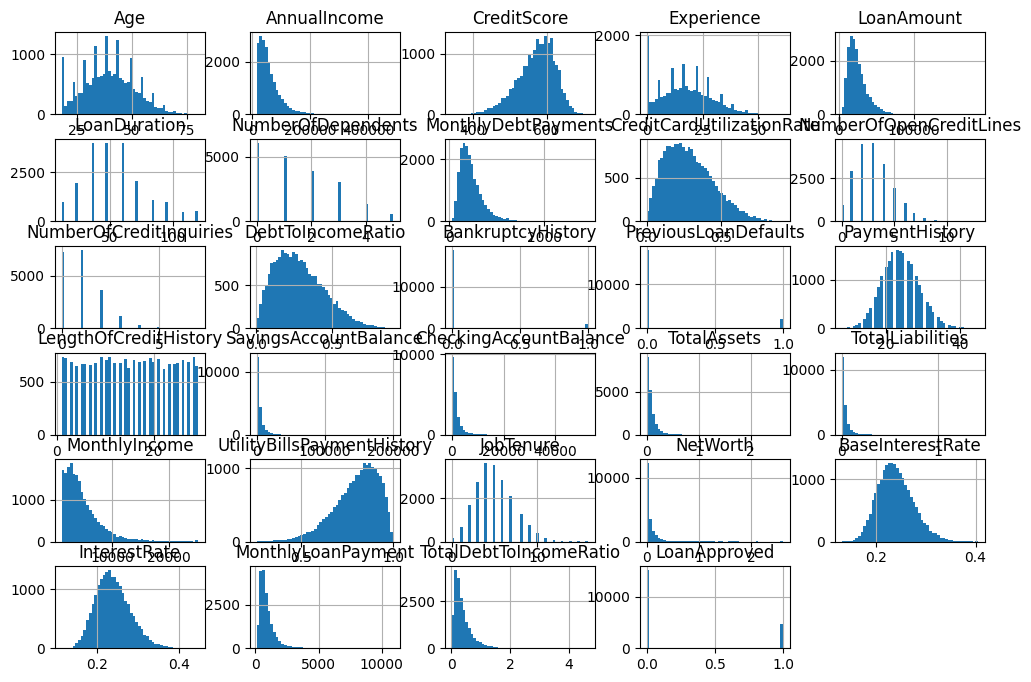

In [14]:
df.hist(bins = 50, figsize=(12,8))
plt.show()

In [15]:
#check if the data is balanced dataset

df['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

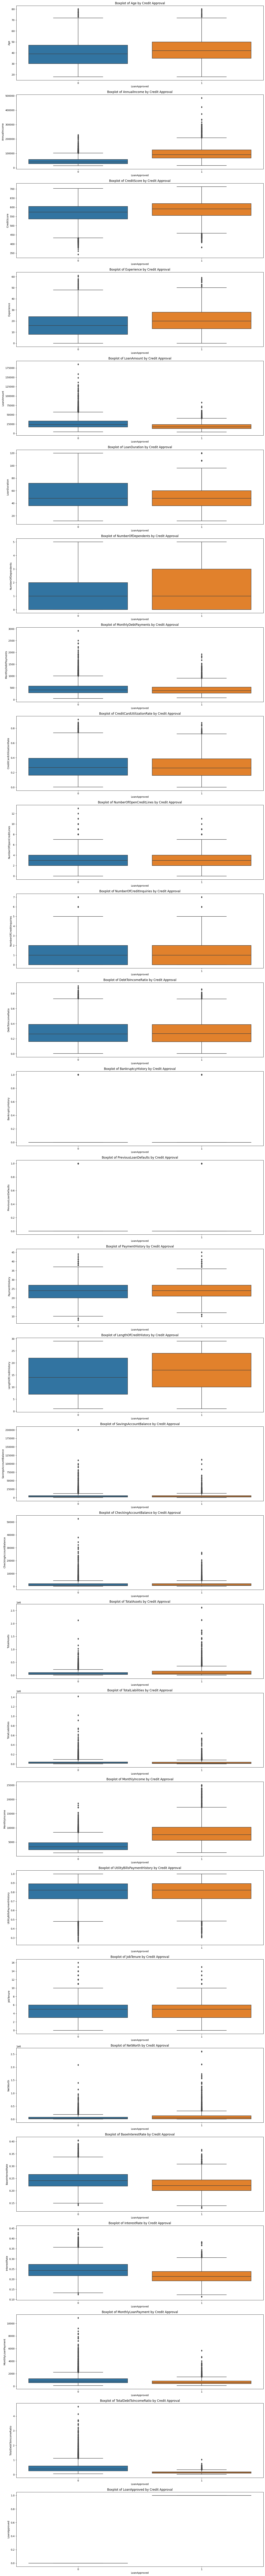

In [16]:
#boxplot of all numerical features on the yaxis and the target var. on the x-axis 
#select all numerical features
numerical_features = df.select_dtypes(include=['number']).columns

#plotting boxplots for all numerical features
plt.figure(figsize=(15, len(numerical_features) * 5))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x = 'LoanApproved', y=col, data = df)
    plt.title(f'Boxplot of {col} by Credit Approval')

plt.tight_layout()
plt.show()

In [ ]:
#The first is Anderson-Darling test to find out normal features, shapiro-wilk test cannot be used for >5000 rows data
from scipy.stats import anderson

normal_features = []

for col in numerical_features:
    result = anderson(df[col].dropna(), dist='norm')
    if result.statistic < result.critical_values[2]:
        normal_features.append(col)

print(normal_features)

[]


#### Tests to find out discriminative features
1. Mann-Whitney U test
2. Kolmogorov-Smirnov test

In [31]:
#there seem to be no nomrally dist. features, hence carrying out the Mann-Whitney U Test to select the discriminative features

from scipy.stats import mannwhitneyu

discriminative_features_mannwhitney = []
for feat in numerical_features:
    group_0 = df[df['LoanApproved'] == 0][feat]
    group_1 = df[df['LoanApproved'] == 1][feat]
    u_stat, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')
    if p_value < 0.05:
        discriminative_features_mannwhitney.append(feat)

print(discriminative_features_mannwhitney)

['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved']


In [30]:
from scipy.stats import ks_2samp

discriminative_features_ks = []
for feat in numerical_features:
    group_0 = df[df['LoanApproved'] == 0][feat]
    group_1 = df[df['LoanApproved'] == 1][feat]
    ks_stat, p_value = ks_2samp(group_0, group_1)
    if p_value < 0.05:
        discriminative_features_ks.append(feat)

print(discriminative_features_ks)

['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved']


In [35]:
if sorted(discriminative_features_ks) == sorted(discriminative_features_mannwhitney):
    print("Both KS and MannWhitney tests give the SAME discriminative features")
else : 
    print("Both KS and MannWhitney tests give DIFFERENT discriminative features")

Both KS and MannWhitney tests give DIFFERENT discriminative features


In [43]:
#Common numerical features b/w KS and MannWhitney tests
common_list = list(set(discriminative_features_ks) & set(discriminative_features_mannwhitney))
common_list

['InterestRate',
 'MonthlyIncome',
 'LoanAmount',
 'TotalDebtToIncomeRatio',
 'TotalLiabilities',
 'AnnualIncome',
 'PaymentHistory',
 'MonthlyLoanPayment',
 'NetWorth',
 'LoanDuration',
 'BankruptcyHistory',
 'TotalAssets',
 'BaseInterestRate',
 'CreditScore',
 'Experience',
 'LoanApproved',
 'LengthOfCreditHistory',
 'PreviousLoanDefaults',
 'Age',
 'MonthlyDebtPayments']

#### Heatmap to find out correlation between target variable
Result - Monthly Income and Annual income cols are correlated; total assets and net worth cols are correlated (both ~0.9 and positive)

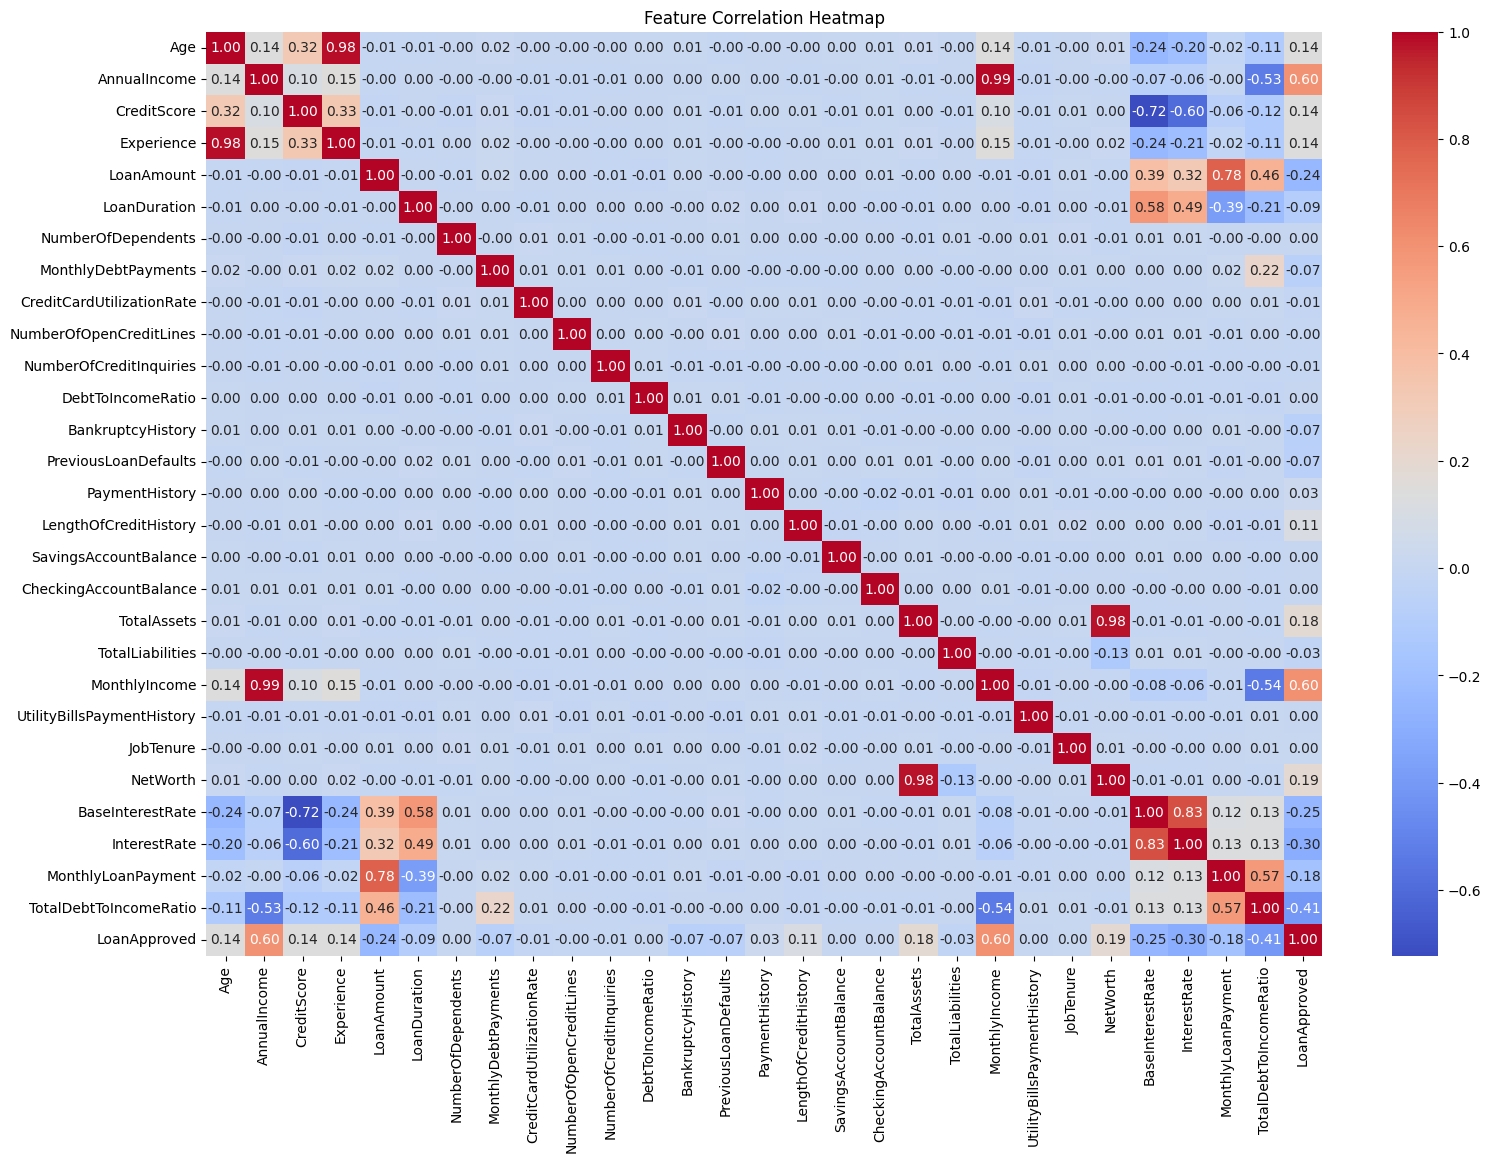

In [67]:
#heat map to check multicoolinearity b/w features and target var.

plt.figure(figsize=(18, 12))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#features monthly income and annual income are highly correlated (positive) and b/w total assets and net worth (positive)


#### Chi-Square Test 
Result - EmploymentStatus, EducationLevel and, HomeOwnershipStatus feature values are significant in determining Loan approval status

In [55]:
#printing all categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


In [56]:
#possible categorical features

possible_categorical_features = [col for col in df.columns if df[col].nunique() < 10]
print(possible_categorical_features)

['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 'LoanApproved']


In [61]:
from scipy.stats import chi2_contingency

for feat in categorical_features:
    contingency_table = pd.crosstab(df[feat], df['LoanApproved'])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    if p <= 0.05: 
        print(f'{feat} - values are SIGNIFICANT in determining Loan Approval status')
    else:
        print(f'{feat} - values are NOT SIGNIFICANT in determining Loan Approval status')


ApplicationDate - values are NOT SIGNIFICANT in determining Loan Approval status
EmploymentStatus - values are SIGNIFICANT in determining Loan Approval status
EducationLevel - values are SIGNIFICANT in determining Loan Approval status
MaritalStatus - values are NOT SIGNIFICANT in determining Loan Approval status
HomeOwnershipStatus - values are SIGNIFICANT in determining Loan Approval status
LoanPurpose - values are NOT SIGNIFICANT in determining Loan Approval status


#### VIF to find out the collinearity b/w ind. features, Proceed with Standardization to get the true variance in the dataset. 
Result - few features removed.

In [ ]:
#Variance Inflation Facor b/w features
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[numerical_features[:-1]] #target var. not included
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data[vif_data['VIF'] > 15])

            Features         VIF
0                Age   29.653484
1       AnnualIncome   49.848565
2        CreditScore  108.857333
3         Experience   29.764839
4         LoanAmount   16.555528
5       LoanDuration   15.969692
18       TotalAssets   39.801463
20     MonthlyIncome   50.690052
23          NetWorth   40.484722
24  BaseInterestRate  201.780058


In [ ]:
#no column has VIF equal to 10
print(vif_data[vif_data['VIF'] == 10])

Empty DataFrame
Columns: [Features, VIF]
Index: []


In [71]:
# removing columns/features - experience, monthly income, net worth, best interest rate, monthly loan payment 
df.drop(columns=['Experience', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'MonthlyLoanPayment'], axis='columns', inplace=True)

#confirm above columns are dropped
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'UtilityBillsPaymentHistory', 'JobTenure',
       'InterestRate', 'TotalDebtToIncomeRatio', 'LoanApproved'],
      dtype='object')

In [ ]:
#Variance Inflation Facor b/w features after removing high VIF featues, deciding not to remove these features as the heatmap indicates no major correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_features = df.select_dtypes(include='number').columns
X = df[numerical_features[:-1]] #target var. not included
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data[vif_data['VIF'] > 15])

                      Features        VIF
2                  CreditScore  73.067779
13              PaymentHistory  23.706576
19  UtilityBillsPaymentHistory  41.680375
21                InterestRate  42.906834


In [103]:
#however scaling the dataset removes high VIF for the above features
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include= 'number').columns
scaler = StandardScaler()
numerical_features = numerical_features[:-1]#loan approved must not be standardized. 
df_scaled = scaler.fit_transform(df[numerical_features])
df_scaled = pd.DataFrame(df_scaled, columns=df[numerical_features].columns)
print(df_scaled)

            Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration   
0      0.451489     -0.476172     0.890021   -0.873672     -0.245578  \
1     -0.150795     -0.482095     1.105724    0.086551     -0.245578   
2      0.623571     -0.456940    -0.031618   -0.540390     -0.732113   
3      1.570017      0.245912    -0.521852    0.969319      1.700559   
4     -0.236835      1.093004     0.439006   -1.169194     -0.732113   
...         ...           ...          ...         ...           ...   
19995  0.365449     -0.718255     0.301741   -0.026951     -0.732113   
19996  1.397936     -0.245738    -0.090446    0.069645     -0.732113   
19997  0.365449     -0.252875     1.439083    0.904897      0.727490   
19998  1.742098     -0.449481    -0.227712   -0.753914      0.727490   
19999 -1.699525     -0.147076     0.046819    0.534154     -0.245578   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate   
0                0.348195            -1.128029            

In [104]:
vif_data = pd.DataFrame()
vif_data['Features'] = df_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]
print(vif_data)

                      Features       VIF
0                          Age  1.134332
1                 AnnualIncome  1.678858
2                  CreditScore  2.283059
3                   LoanAmount  1.772325
4                 LoanDuration  1.930353
5           NumberOfDependents  1.000939
6          MonthlyDebtPayments  1.107397
7    CreditCardUtilizationRate  1.000929
8      NumberOfOpenCreditLines  1.000807
9      NumberOfCreditInquiries  1.000567
10           DebtToIncomeRatio  1.001035
11           BankruptcyHistory  1.000906
12        PreviousLoanDefaults  1.001103
13              PaymentHistory  1.001085
14       LengthOfCreditHistory  1.001096
15       SavingsAccountBalance  1.000637
16      CheckingAccountBalance  1.000746
17                 TotalAssets  1.000967
18            TotalLiabilities  1.000598
19  UtilityBillsPaymentHistory  1.001528
20                   JobTenure  1.000991
21                InterestRate  3.308498
22      TotalDebtToIncomeRatio  2.407049


#### clubbing the standardized dataset with categorical cols in the dataset to begin training process

In [ ]:
#printing columns which are of category or object type
print(df.select_dtypes(include=['category', 'object']).columns)

Index(['ApplicationDate', 'EmploymentStatus', 'EducationLevel',
       'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')


In [97]:
#removing ApplicationDate column and applying pd.dummies() on the dataset for categorical encoding
df.drop('ApplicationDate', axis = 1, inplace = True)

In [105]:
categorical_features = df.select_dtypes(include=['category', 'object']).columns
df_scaled = pd.concat([df_scaled, df[categorical_features]], axis = 1)
df_scaled.head()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,InterestRate,TotalDebtToIncomeRatio,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,0.451489,-0.476172,0.890021,-0.873672,-0.245578,0.348195,-1.128029,0.425792,-1.165445,1.020325,...,-0.361255,-0.621121,2.681281,-0.272968,-0.652388,Employed,Master,Married,Own,Home
1,-0.150795,-0.482095,1.105724,0.086551,-0.245578,-0.373154,0.173418,-1.242602,1.138546,2.033558,...,-0.564174,1.120606,-0.895340,-0.901165,-0.036378,Employed,Associate,Single,Mortgage,Debt Consolidation
2,0.623571,-0.456940,-0.031618,-0.540390,-0.732113,0.348195,1.861556,-0.932273,-0.589447,-1.006140,...,1.960232,0.599385,0.445893,-0.629370,0.176962,Employed,Bachelor,Married,Rent,Education
3,1.570017,0.245912,-0.521852,0.969319,1.700559,-0.373154,1.250334,-0.117617,-0.589447,0.007093,...,-0.653591,0.797576,-0.001185,1.464331,-0.262848,Employed,High School,Single,Mortgage,Home
4,-0.236835,1.093004,0.439006,-1.169194,-0.732113,-0.373154,-0.749653,0.213746,-1.741443,-1.006140,...,-0.401403,1.172293,-0.001185,-1.495584,-0.979511,Employed,Associate,Married,Mortgage,Debt Consolidation


In [108]:
#one hot encoding the categorical features
df_scaled_encoded = pd.get_dummies(df_scaled, dtype= int, drop_first = True) # drop_first = True removes redundancy
print(df_scaled_encoded)

            Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration   
0      0.451489     -0.476172     0.890021   -0.873672     -0.245578  \
1     -0.150795     -0.482095     1.105724    0.086551     -0.245578   
2      0.623571     -0.456940    -0.031618   -0.540390     -0.732113   
3      1.570017      0.245912    -0.521852    0.969319      1.700559   
4     -0.236835      1.093004     0.439006   -1.169194     -0.732113   
...         ...           ...          ...         ...           ...   
19995  0.365449     -0.718255     0.301741   -0.026951     -0.732113   
19996  1.397936     -0.245738    -0.090446    0.069645     -0.732113   
19997  0.365449     -0.252875     1.439083    0.904897      0.727490   
19998  1.742098     -0.449481    -0.227712   -0.753914      0.727490   
19999 -1.699525     -0.147076     0.046819    0.534154     -0.245578   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate   
0                0.348195            -1.128029            

In [109]:
df_scaled_encoded.head()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.451489,-0.476172,0.890021,-0.873672,-0.245578,0.348195,-1.128029,0.425792,-1.165445,1.020325,...,1,0,0,0,1,0,0,0,1,0
1,-0.150795,-0.482095,1.105724,0.086551,-0.245578,-0.373154,0.173418,-1.242602,1.138546,2.033558,...,0,1,0,0,0,0,1,0,0,0
2,0.623571,-0.456940,-0.031618,-0.540390,-0.732113,0.348195,1.861556,-0.932273,-0.589447,-1.006140,...,1,0,0,0,0,1,0,1,0,0
3,1.570017,0.245912,-0.521852,0.969319,1.700559,-0.373154,1.250334,-0.117617,-0.589447,0.007093,...,0,1,0,0,0,0,0,0,1,0
4,-0.236835,1.093004,0.439006,-1.169194,-0.732113,-0.373154,-0.749653,0.213746,-1.741443,-1.006140,...,1,0,0,0,0,0,1,0,0,0


#### Train-Test Split and Model Training process. 

In [110]:
#Train-test split 
from sklearn.model_selection import train_test_split

X = df_scaled_encoded.iloc[:, :-1] # Features
y = df_scaled_encoded.iloc[:, -1] #Target

#train-test split with train:test = 4:1
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2, random_state=42)

#extra cell for any code.

(16000, 38)

(16000,)